# Linear Models
### Foundations of Machine Learning
### `! git clone https://github.com/ds4e/`

## Introduction
- Neighborhood-based models break down quickly as the number of dimensions increase: In high-dimensional spaces, everything is equally far apart and neighborhoods become meaningless
- To exploit datasets with many columns/variables, we apply weights to the variables, and aggregate **variables into predictions** (global smoothing), rathen than focusing on aggregating **observations into predictions** (local smoothing)
- This is the beginning of some of our most powerful, flexible models, eventually leading to neural networks and deep learning (as opposed to trees, random forests, and boosted trees)

## Outline
1. Example
2. Single Linear Regression 
3. Multiple Linear Regression

# 1. Example

## Hedonic Pricing
- Many products --- cars, houses/apartments, computers --- are described by a variety of variables (horsepower, number of seats, color, brand; location, square footage, number of beds/baths, distance to public transportation/shopping, quality of schools; GB of RAM, GB storage, type of storage, GPU and GB of VRAM)
- When we take the price and try to break it down by the product's attributes, we are doing **hedonic pricing**: explaining the price by the way features generate value or utility

## Hedonic Pricing

- For example, if we wanted to study car prices, we weight each variable $x_k$ by a **coefficient/weight/slope** $b_k$:
\begin{alignat*}{2}
\widehat{\text{price}} &=& \underbrace{b_0}_{\text{Constant/bias/intercept}} + b_{\text{mileage}} \times \text{mileage} + b_{\text{horsepwr}} \times \text{horsepwr}\\
&& + b_{\text{electric}} \times \text{electric} + b_{\text{sunroof}} \times \text{sunroof} + ... + b_{\text{used}} \times \text{used} \\
&& + b_{\text{audi}} \times \text{audi} + b_{\text{honda}} \times \text{honda} + ... + b_{\text{toyota}} \times \text{toyota}
\end{alignat*}
- Each weight $b_k$ allows the variable $x_k$ to have some impact on the predicted price
- Conversely, the $b_k$ provides a clear explanation for why we make the predictions we do

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('./data/craiglist_cville_cars_long.csv')
df['age'] = np.max(df['year']) - df['year']
df.head()

,Unnamed: 0,title,price,year,link,brand,age,log_price,log_age,title.1,year_post,condition,cylinders,drivetrain,fuel,miles,color,transmission,bodytype,text
0,0,2005 hyundai elantra,1200,2005.0,https://charlottesville.craigslist.org/cto/d/a...,missing,16.0,7.090077,2.995732,title,2005,fair,4 cylinders,fwd,gas,232450,silver,manual,sedan,‘05 Elantra runs good but did not pass inspect...
1,1,2007 f250 king ranch,17500,2007.0,https://charlottesville.craigslist.org/cto/d/w...,missing,14.0,9.769956,2.890372,title,2007,good,8 cylinders,4wd,diesel,148086,missing,automatic,pickup,"6.0 diesel, bulletproofed, just replaced trans..."
2,2,1997 dodge 2500 4x4 cummins,9500,1997.0,https://charlottesville.craigslist.org/cto/d/l...,dodge,24.0,9.159047,3.332205,title,1997,fair,6 cylinders,4wd,diesel,179000,red,automatic,truck,1997 Dodge 4x4 Cummins. Adult owned and driven...
3,3,1999 honda civic 4 cyl manual transmission,1000,1999.0,https://charlottesville.craigslist.org/cto/d/c...,honda,22.0,6.907755,3.258097,title,1999,salvage,4 cylinders,rwd,gas,195338,silver,manual,sedan,"Vehicle does start and run, it has a manual tr..."
4,4,"1998 gmc sierra 1500 sl truck auto rwd <103,00...",6250,1998.0,https://charlottesville.craigslist.org/cto/d/l...,gmc,23.0,8.740337,3.295837,title,1998,good,8 cylinders,rwd,gas,102483,missing,automatic,truck,"1998 GMC Sierra 1500 SL Truck, Auto 2WD/RWD, V..."


## Regressing Price on Miles and Age
- Scikit, of course, has an API for running linear models:
``` python
from sklearn.linear_model import LinearRegression
```
- Let's see it in action

In [76]:
from sklearn.linear_model import LinearRegression

tdf = df.loc[:, ['price', 'miles', 'age'] ].dropna() # Filter, drop missing values
y = tdf['price'] # Select target/outcome
X_num = tdf.loc[ :, ['miles', 'age']] # Select features/covariances

model = LinearRegression()
model = model.fit(X_num, y)

# Print coefficients:
print(f'Model intercept: {model.intercept_}')
pd.DataFrame({'variable':model.feature_names_in_, 'coefficient':model.coef_ })


Model intercept: 22057.403093432233


,variable,coefficient
0,miles,-0.078672
1,age,-90.739677


## One Hot Encoding
- For this to work, all of our variables must be numeric; many of our most promising variables are categorical
- We convert a qualitative variable like `brand` or `color` or `used/new` into a numeric representation, called **one hot encoding** or a **dummy variable**
- Let's do that with color, to see how it works with Pandas
- This is one of your most common data cleaning or feature engineering tasks


In [77]:
df['color'].value_counts()

color
white      18
missing    17
black      15
silver     12
red         9
blue        8
grey        5
green       5
brown       1
custom      1
yellow      1
Name: count, dtype: int64

In [78]:
pd.get_dummies(df['color']).head()

,black,blue,brown,custom,green,grey,missing,red,silver,white,yellow
0,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,True,False,False,False,False


## The Dummy Variable Trap
- In our regressions, the variables/columns must be **linearly independent**: If we can reconstruct any column from any (linear) combination of other columns, those variables are **linearly dependent** and the model exhibits **perfect multicolinearity**
- Because the model can't functionally differentiate between the linearly dependent columns, it can't assign weights, and we can't solve uniquely for coefficients
- The solution is easy: Drop one of the linearly dependent columns
- Pandas does this for you with the `drop_first=True` option; you'll see `black` no longer appears. The dropped label becomes the label to which we're comparing all of the other labels.

In [79]:
X_color = pd.get_dummies(df['color'], dtype='int', drop_first=True)
X_color.head()

,blue,brown,custom,green,grey,missing,red,silver,white,yellow
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0


## 

In [80]:
from sklearn.linear_model import LinearRegression

tdf = df.loc[:, ['price', 'miles', 'age', 'color'] ].dropna() # Filter, drop missing values
y = tdf['price'] # Select target/outcome

# Create covariate/feature matrix:
X_num = tdf.loc[ :, ['miles', 'age']] # Select numeric features/covariances
X_color = pd.get_dummies(tdf['color'], dtype='int', drop_first=True)
X = pd.concat([X_num,X_color], axis = 1)

model = LinearRegression()
model = model.fit(X, y)

In [81]:
print(f'Model intercept: {model.intercept_}')
pd.DataFrame({'variable':model.feature_names_in_, 'coefficient':model.coef_ })

Model intercept: 26080.584328560195


,variable,coefficient
0,miles,-0.074054
1,age,-89.843838
2,blue,-6112.016223
3,custom,4522.254264
4,green,-5927.972916
5,grey,-5735.183459
6,missing,-5211.090346
7,red,-7238.214947
8,silver,-5709.279355
9,white,-4684.155340


## Results
- So each year takes about 90 dollars off the price of a car, and each mile costs 7 cents
- Compared to a black car, almost every other color reduces the price by about 5,000 dollars --- black holds its value the most, by far, and red has the worst resale value
- We can add more numeric and categorical variables to the regression, and build a complex and nuanced model for predicting the expected sale price of a vehicle
- If you paint a car black, does its price go up by about 5000, or are black cars disproportionately made by luxury brands like BMW?

# 2. Single Linear Regression

## Single Linear Regression
- When we have only one explanatory variable and a constant, our predictive model takes a simple form:
$$
\hat{y}_i = b_0 + b_1 x_{1i} 
$$
- The residual for this model is
$$
r_i = y_i - \hat{y}_i = y_i - b_0 - b_1 x_{1i}
$$
- The mean squared error (MSE) is
$$
\text{MSE}(b_0, b_1) = \frac{r_1^2 + ... + r_n^2}{n} = \frac{1}{n} \sum_{i=1}^n (y_i - b_0 - b_1 x_{1i})^2
$$
- We choose $(b_0,b_1)$ to minimize the MSE. That is what machine learning is: Picking model parameters and hyperparameters to minimize a loss function. The "learning" is about the best values of the parameters.

Text(0, 0.5, 'Y')

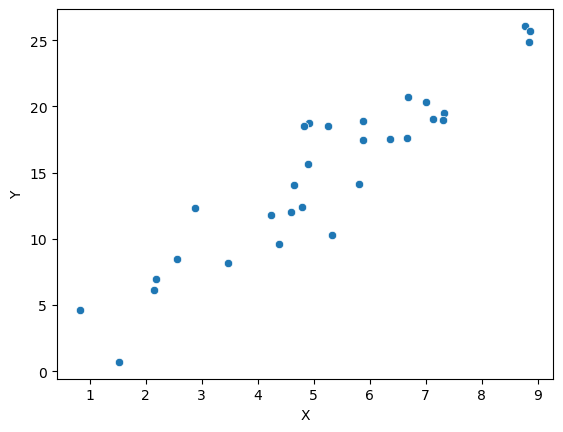

In [82]:
np.random.seed(500) # Set the seed for the random number generator
N = 30
x = 5 + 2*np.random.normal(0,1,size = N) # Create an x
eps = np.random.normal(0,3,size = N) # Create noise
b0 = -1 # Intercept coefficoent
b1 = 3 # Slope coefficient
y = b0 + b1*x + eps

sns.scatterplot(x=x,y=y)
plt.xlabel("X")
plt.ylabel("Y")

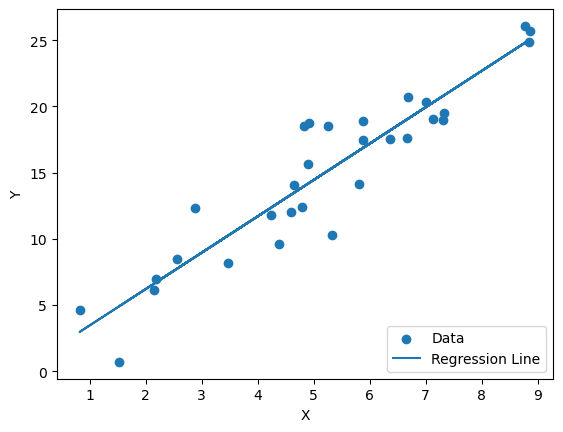

In [83]:
model = LinearRegression()
model = model.fit(x.reshape(-1,1), y)
y_hat = model.predict(x.reshape(-1,1))

plt.scatter(x,y,label='Data')
plt.plot(x,y_hat,label='Regression Line')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='lower right')

Text(0.5, 1.0, 'Visualizing Residuals')

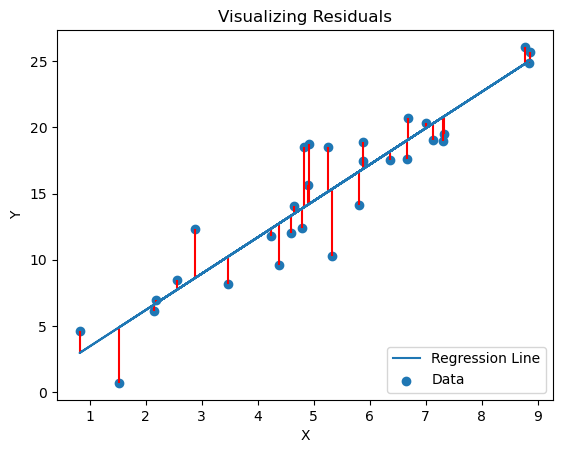

In [84]:
for i in range(len(x)):
    plt.vlines(x[i], y[i], y_hat[i], color='r') # Visualize residuals
plt.plot(x,y_hat,label='Regression Line')
plt.scatter(x,y,label='Data')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='lower right')
plt.title('Visualizing Residuals')

## Optimal Coefficients
- To minimize the MSE, we
    1. Take the (partial) derivatives with respect to $b_0$ and $b_1$
    2. Set those (partial) derivatives equal to zero
    3. Solve the system of equations for $(\hat{b}_0, \hat{b}_1)$
- A standard trick for the purposes of this exercise is to subtract the means from each of the variables first, to simplify calculations -- Let's do it on the board, setting
$$
\tilde{y}_i = y_i - \bar{y}, \quad \tilde{x}_i = x_i - \bar{x}
$$
and solving for $(\tilde{b}_0, \tilde{b}_1)$, and then substituting the original values back in. Notice that $\frac{1}{n} \sum_{i=1}^n x_i - \bar{x} = 0$, so that $\frac{1}{n} \sum_{i=1}^n \tilde{x}_i = 0$.
- What do the final regression coefficients represent values represent, statistically?

## Partialing Out, Projection
- The regression breaks $y$ into two pieces:
\begin{alignat*}{2}
y_i &=& (y_i - \hat{y}_i) + \hat{y}_i\\
&=& e_i + \hat{y}_i\\
\underbrace{y_i}_{\text{True value}} &=& \underbrace{e_i}_{\text{Error, residual}} + \underbrace{x_i \cdot b}_{\text{Model, prediction}}
\end{alignat*}
- But the residual from OLS averages to zero: It is uncorrelated with the prediction
- You can understand linear regression as removing the variation in $Y$ that can be explained by $X$ --- The residual contains all of the noise, the predictor $\hat{b} \cdot x$ contains all of the signal


Text(0.5, 1.0, 'Residuals: Noise')

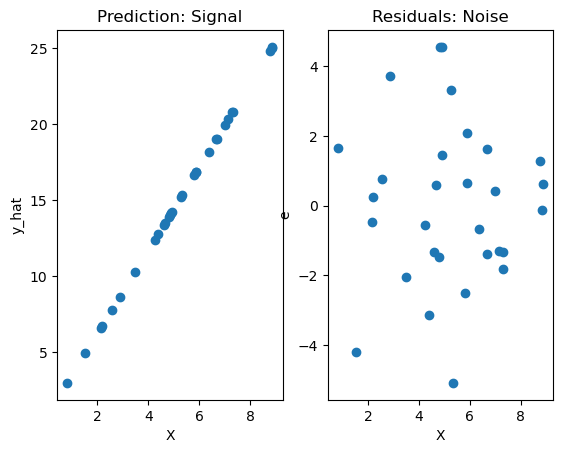

In [85]:
plt.subplot(1, 2, 1)
plt.scatter(x,y_hat)
plt.xlabel("X")
plt.ylabel("y_hat")
plt.title('Prediction: Signal')

plt.subplot(1, 2, 2)
plt.scatter(x,y-y_hat)
plt.xlabel("X")
plt.ylabel("e")
plt.title('Residuals: Noise')

In [89]:
pd.DataFrame({'residuals':y-y_hat,'x':x}).cov() # Compute correlation between e and x

,residuals,x
residuals,5.494074e+00,-1.576940e-15
x,-1.576940e-15,4.537413e+00


## Geometry of Regression
- When we do regression, we are **projecting** the observed outcomes onto the model space
- We are finding the explanation in our model space as close as possible to the observed patterns
- What that means is that the covariance between our errors and our explanatory variables should be zero: There's no signal left to extract from the data, and only noise
- In linear algebra terms, the explanatory variable and the error term are **orthogonal**, and in statistical terms, the covariance is zero: $x \cdot e = 0$.

# 3. Multiple Linear Regression

## Add More Covariates
- It is important and helpful to learn about SLR! The intuition carries over to scenarios with more variables in deep ways
- But... we want a lot of variables in our regressions
- In principle, this is easy to do: Just go back to the original concept:
$$
\hat{y}_i = b_0 + b_1 x_{i1} + b_2 x_{i2} + ... + b_L v_{iL}
$$
- But we also want to understand how this method "works"

## SciKit
- Of course, we can run MLR simply by passing a larger feature matrix into the API:
``` python
y = df['target_variable']
X = df.loc[:, ['feature_1`, `feature_2`, ..., 'feature_L`] ]
model = LinearRegression().fit(X,y)
```

## Partial Regression
- With linear algebra, we can "solve" MLR the same way we solved SLR: The solution is $\hat{b} = (X^{\top}X)^{-1}(X^{\top}y) \approx \text{cov}(X,y)/\text{cov(X,X)}$
- There is a much more intuition way to understand what the slope coefficients are, using this algorithm to generate them:
    1. First Stage: Pick a variable $x_k$. Regress $y$ and $x_k$ on all of the other variables in the regression, and save the residuals, $r_y$ and $r_{x_k}$.
    2. Second Stage: Run single linear regression of $r_y$ on $r_{x_k}$. The slope coefficent has the same value as $\hat{b}_k$
- If you understand why this works, it will give you powerful intuition about how variables change model performance

In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

mse = lambda y,y_hat: np.sum( (y-y_hat)**2 )/len(y)


df = pd.read_csv('./data/heart_failure_clinical_records_dataset.csv')
df.head()

vars = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT',]
df = df.loc[:,vars]

y = df['DEATH_EVENT']
X = df.drop('DEATH_EVENT', axis=1)

In [19]:
model = LinearRegression().fit(X,y)
y_hat = model.predict(X)

print(f'Mean squared error:{mse(y,y_hat)}')
print(f'Model intercept: {model.intercept_}')
pd.DataFrame({'variable':model.feature_names_in_, 'coefficient':model.coef_ })

Mean squared error:0.16652179326656025
Model intercept: 1.4978287986498122


,variable,coefficient
0,age,9.012270e-03
1,anaemia,5.487855e-02
2,creatinine_phosphokinase,4.880138e-05
3,diabetes,1.663591e-02
4,ejection_fraction,-1.059109e-02
5,high_blood_pressure,6.795378e-02
6,platelets,-7.210837e-08
7,serum_creatinine,1.063219e-01
8,serum_sodium,-1.096045e-02
9,sex,-6.255923e-02


In [20]:
vars = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
    'ejection_fraction', 'high_blood_pressure', 'platelets',
    'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT',]

for var in vars:
    df = df.loc[:,vars]
    y = df['DEATH_EVENT']
    x = df[var]
    X = df.drop( ['DEATH_EVENT',var], axis=1)

    # y regression
    model = LinearRegression().fit(X,y)
    y_hat = model.predict(X)
    r_y = y - y_hat

    # x regression
    model = LinearRegression().fit(X,x)
    x_hat = model.predict(X)
    r_x = x - x_hat

    # r_y on r_x:
    model = LinearRegression().fit(r_x.to_numpy().reshape(-1,1),r_y)
    print(f'{var} : {model.coef_}')



age : [0.00901227]
anaemia : [0.05487855]
creatinine_phosphokinase : [4.88013782e-05]
diabetes : [0.01663591]
ejection_fraction : [-0.01059109]
high_blood_pressure : [0.06795378]
platelets : [-7.21083687e-08]
serum_creatinine : [0.10632186]
serum_sodium : [-0.01096045]
sex : [-0.06255923]
smoking : [0.0134041]
DEATH_EVENT : [1.]


## Multicolinearity
- This is extremely important!
- Imagine we regress $y$ on two variables $x_1$ and $x_2$ that are very highly correlated with each other and $y$...
- The two variables explain the same variation in the target/response/outcome variable...
- So in MLR, they tend to cancel each other out, explaining the same variation in $y$ in the first stage
- This leads to "mushy" predictions that use lots of great data to provide highly variable and unreliable models
- This is called **multicolinearity**: The tendency of highly correlated variables to cancel one another out, and give the model an unexpected "mushy" and "high variance" quality
- The lesson is that by dropping variables, your model can become a better predictor
- Many of our tools (Principal Components Analysis, Regularization) are designed to reduce the correlation between explanatory variables or pick the best set of explanatory variables

## Interpreting Coefficients
- The implications of changes in $x_k$ are easy to understand: If $x_k$ goes up by $1$, then $\hat{y}$ goes up by $b_k$ on average, controlling for the other variables in the regression
- If you understand partial regression, you understand that, for the most part, we cannot really interpret these coefficients as **causal estimates**: If we intervene and adjust $x_{ik}$, $\hat{y}_i$ is not necessarily going to move by $b_k$ in expectation
- If, however, we have two cases, $\hat{x}_1$ and $\hat{x}_2$, and the only difference in their values is a 1 unit change in the $k$-th variable, then we would expect the change in their expected outcomes to be $b_k$
- The difference is subtle, but very important: The world generates the data according to complex processes, and we can guess what's going to happen based on the data we have, but intervening in the system is not something we can understand or learn from these kind of data (we have no credible **identification strategy** for **causal effects**)

## Model Selection
- "What variables go in the model?"
- In $k$-NN, our hyperparameter was $k$, the number of neighbors: The model is always tempted to pick a smaller $k$ and use a more highly variable and overconfident model to make predictions -- in local smoothing, the model wants to increase variability and reduce reliability by taking a very small set of neighbors from which to make predictions. This needs to be disciplined.
- With linear regression, the problem is that using more variables always improves fit on the training data, but can simultaneously reduce performance on the test/validation data. This is typically because multicolinearity results in overfitting.

## Conclusion
- Linear regression, despite its simplicity, is one of our most powerful tools for analyzing data
- This general pattern of thinking -- describe error, pick a loss function, use calculus/gradient descent to minimize the loss -- is the backbone of machine learning (this is the simplest form of neural network with one output node and no hidden layers)
- One of linear regression's greatest advantages is that it is explainable and interpretable: The choice of coefficients ultimately makes a lot of sense (scaled covariances between the response and the feature), and changes in $x$ lead to easily understood changes in $\hat{y}$
- For many fields of scientific inquiry, linear regression is the workhorse quantitative tool